# Sharpe Ratios and Diversification
## Using the Sharpe Ratio to Evaluate Risk-Adjusted-Returns

## What is the Sharpe Ratio?
Put simply, the Sharpe Ratio is how much you earn per unit of volatility you take on.

- High Sharpe = more efficient returns relative to risk.
    
- Low Sharpe = less efficient risk-taking.
    
It is used as a way to calculate risk-adjusted returns.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

In [2]:
# Tickers for analysis: Microsoft (MSFT) and Alibaba (BABA)
tickers = ['MSFT', 'BABA']

close_prices = (
    yf.download(tickers, period="2y", auto_adjust=True, progress=False)['Close']
    .dropna()
)

Before calculating returns or risk, let's take a look at the raw stock prices of Microsoft and Alibaba over the last 2 years

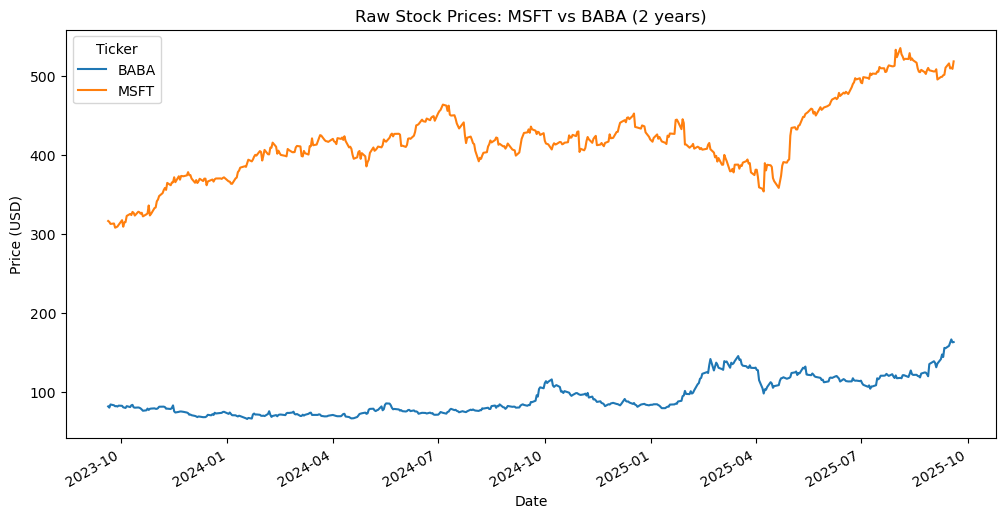

In [3]:
close_prices.plot(figsize=(12, 6))
plt.title("Raw Stock Prices: MSFT vs BABA (2 years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

Notice how the stocks seem to move largely independently.

This will be valuable to us later.

Now that we've observed their individual movements, we can quantify their risk-adjusted performance using the Sharpe ratio.

<hr>

## Individual Sharpes

To compute the Sharpe ratio of each stock, we need their average daily returns as well as their volatilities (how much our return fluctuates).

Dividing the average return by the volatility gives us the Sharpe ratio - a measure of how much return we recieve per unit of risk.

In [17]:
returns = close_prices.pct_change().dropna()
return_mean = returns.mean()
return_volatility = returns.std()
sharpe = return_mean / return_volatility

In [5]:
sharpe

Ticker
BABA    0.065161
MSFT    0.076956
dtype: float64

Our ratios of ~0.065 and 0.07 show that each stock provides only a small return per unit of risk.

For individual investors, relying on low-risk low-return asset to makes it hard to generate real gains without exposing themself to more risk.

This is where diversification comes in: combining stocks that move separately to generate a better Sharpe ratio.

In [6]:
# Normalizing for even portfolio weight + better visualization
normalized = (close_prices / close_prices.iloc[0]) * 100
normalized['Portfolio'] = normalized.mean(axis=1)

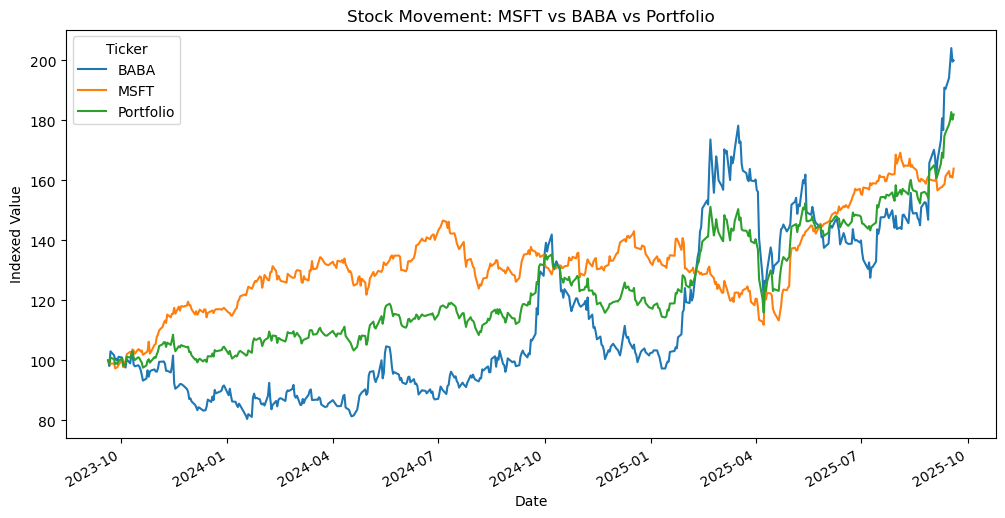

In [7]:
normalized.plot(figsize=(12, 6))
plt.title("Stock Movement: MSFT vs BABA vs Portfolio")
plt.xlabel("Date")
plt.ylabel("Indexed Value")
plt.show()

We can see that our portfolio follows its own path, an average of the two with a steadier growth rate and what appears to be a lower volatility.

We can visualize the distributions to show how the returns are spread:

In [15]:
# Recreate returns + convert wide data to long
returns = normalized.pct_change().dropna()
long_returns = returns.reset_index().melt(
    id_vars="Date",
    var_name="Ticker",
    value_name="Return"
)

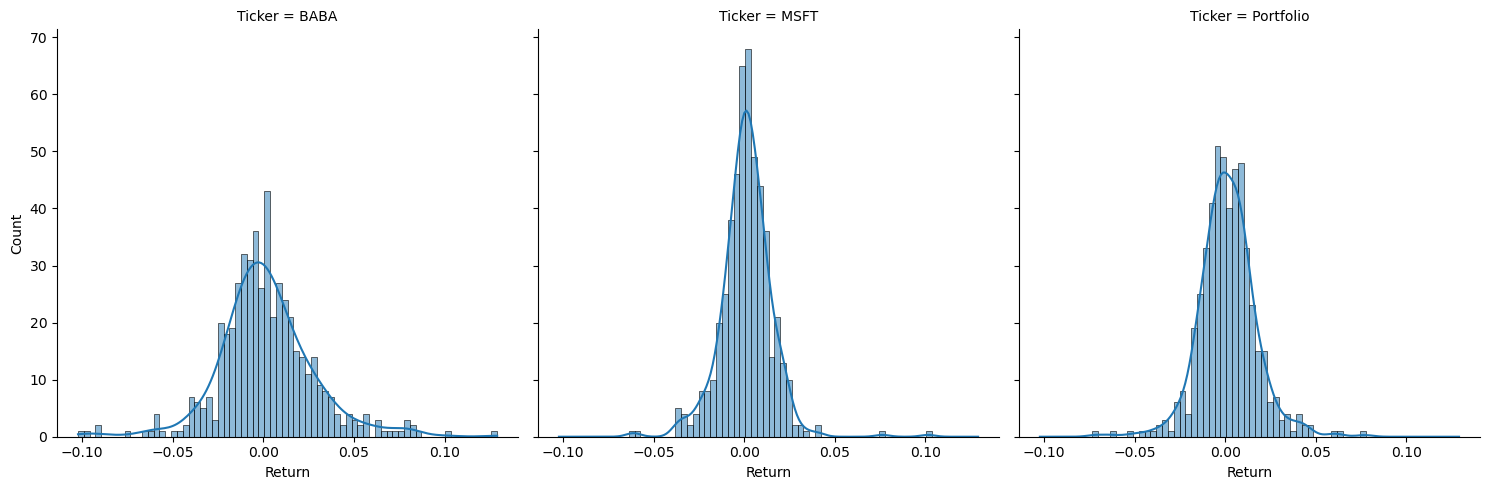

In [9]:
sns.displot(
    data=long_returns,
    x="Return",
    col="Ticker",
    kde=True
);

Although MSFT’s returns appear more tightly clustered (lower volatility) than the portfolio’s, the portfolio shows a higher average return.

To determine whether this return compensates for the volatility, we recalculate the Sharpe ratios to include the portfolio alongside the stocks.

<hr>

## The Portfolio Sharpe

In [10]:
# Creating our variables
return_mean = returns.mean()
return_volatility = returns.std()

In [11]:
# Sharpe = mean / volatility(std dev)
sharpes = return_mean / return_volatility
constituent_sharpes = (sharpes['BABA'] + sharpes['MSFT']) / 2

In [12]:
for ticker in sharpes.index:
    print(f"{ticker}: {sharpes[ticker]:.3f}")
print(f"Per-stock average Sharpe: {
    constituent_sharpes:.3f}\n% Improvement: {
            (sharpes['Portfolio'] * 100) / (constituent_sharpes * 100) * 100 - 100:.2f}%")

BABA: 0.065
MSFT: 0.077
Portfolio: 0.084
Per-stock average Sharpe: 0.071
% Improvement: 18.02%


The combined performance of this investment shows nearly a 19% increase in risk-adjusted-returns achieved through **diversification** alone.

This change can be scaled further with even more selective and well-researched assets, all acting together as an integrated investment.

## Leverage to Amplify Returns

Leveraging is a core concept of finance. All it breaks down to is borrowing money to increase the size of your investment.

Though this seems elementary, it is incredibly useful in the case of managing risk and returns.

To demonstrate, we will take our normalized values and double our investment into this portfolio (ratios remaining even).

In [13]:
normalized['Portfolio'] = normalized['Portfolio'] * 2

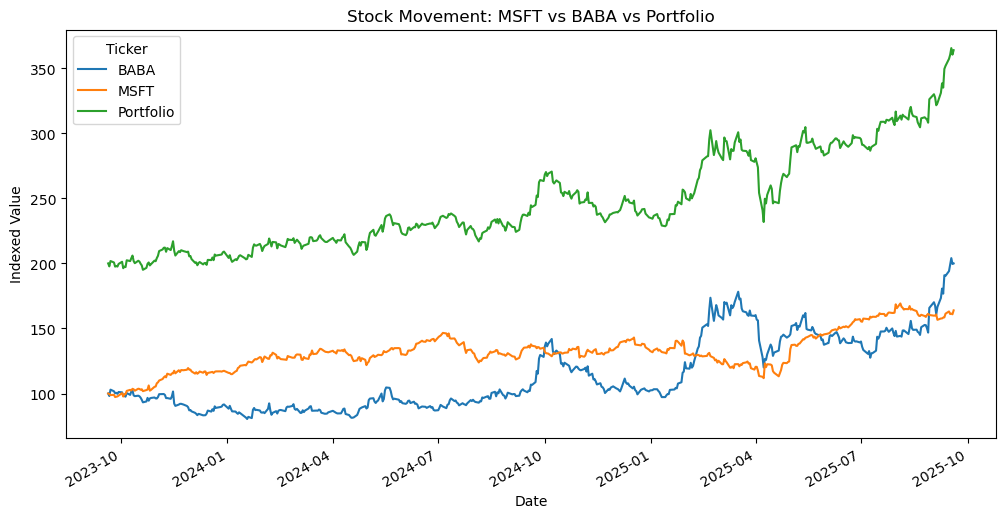

In [14]:
normalized.plot(figsize=(12, 6))
plt.title("Stock Movement: MSFT vs BABA vs Portfolio")
plt.xlabel("Date")
plt.ylabel("Indexed Value")
plt.show()